In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd drive/

/content/drive


In [9]:
%cd MyDrive/

/content/drive/MyDrive


In [10]:
%cd COVID/Normal/

/content/drive/MyDrive/COVID/Normal


In [11]:
%cd ..

/content/drive/MyDrive/COVID


In [12]:
import glob
import os
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
%ls-l

total 8
drwx------ 2 root root 4096 Apr  9 12:49 Affected/
drwx------ 2 root root 4096 Apr  9 07:51 Normal/


In [14]:
normal_files = os.listdir('Normal/')
print(normal_files)
affected_files = os.listdir('Affected/')
print(affected_files)

['IM-0025-0001.jpeg', 'IM-0022-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0007-0001.jpeg', 'IM-0016-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0021-0001.jpeg', 'IM-0019-0001.jpeg', 'IM-0027-0001.jpeg', 'IM-0011-0001-0002.jpeg', 'IM-0011-0001.jpeg', 'IM-0023-0001.jpeg', 'IM-0013-0001.jpeg', 'IM-0011-0001-0001.jpeg', 'IM-0015-0001.jpeg', 'IM-0001-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0009-0001.jpeg', 'IM-0010-0001.jpeg', 'IM-0017-0001.jpeg']
['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png', '1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png', '1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-0

In [15]:
%cd Normal/

/content/drive/MyDrive/COVID/Normal


In [16]:
def extract_feat(img):
  out_img= np.zeros((img.shape[0], img.shape[1]))
  for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      n=[0]*8
      cen= img[i, j]
      n[0]=img[i, j-1]>cen
      n[1]=img[i-1, j-1]>cen
      n[2]=img[i-1, j]>cen
      n[3]=img[i-1, j+1]>cen
      n[4]=img[i, j+1]>cen
      n[5]=img[i+1, j+1]>cen
      n[6]=img[i+1, j]>cen
      n[7]=img[i+1, j-1]>cen
      temp=0
      for k in range(len(n)):
        temp+=n[k]*(2**k)
      out_img[i, j]=temp
  return out_img  

In [17]:
def final_feat(img):
  lbp_img=extract_feat(img)
  hist1=np.histogram(lbp_img, bins=256)
  return(hist1[0])

[[1 1 1 ... 8 7 2]
 [1 1 1 ... 8 7 2]
 [1 1 1 ... 8 6 2]
 ...
 [0 0 0 ... 5 4 2]
 [0 0 0 ... 5 3 0]
 [0 0 0 ... 5 3 0]]


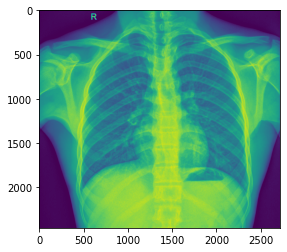

In [18]:
img_arr=plt.imread(normal_files[0])
print(img_arr)
plt.imshow(img_arr)

In [19]:
lbp_img=extract_feat(img_arr)

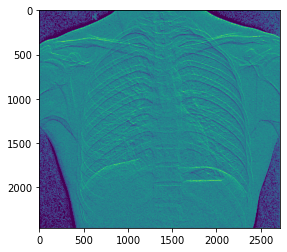

In [20]:
plt.imshow(lbp_img)

In [21]:
hist1=np.histogram(lbp_img, bins=256)
print(hist1[0])

[975589 128618  43874  89249  96247   7584  78154 107698  44612  10892
   2335   4035  78543  10589 100482  94297 128769  11203  10816   6888
   7593    459  10552   3885  90780   6931   3992   5925 107821   3754
  93039  41113  45981  10974   6961  13217   8736    582  12785  14907
   2933   1219    286    684   4326   1114   8955  10854  90962   7044
  12915   8418   8532    435  16946   7418 119675   5191   6854   7908
  88818   2403 105760  43363  98698   7690   8408   8536   9526    471
   6085   3293   8587    579   1083    842   6093    451   5042   2541
   7629    501    596    393    518     38    434    131   8442    428
    806    894   3336    161   2516   1086  82872  11030  12977  16944
   6187    454   9460   8471   4376    968    661    784   6901   1166
  10236   9259 112634   4012  15264   7496   3342    146   8451   1784
  84629   2442   8626   7055  45876   1350  53089  15182  45114  90001
   2896 114523   8662   8579   4363  88202   7010  13188    253   6981
  1299

In [22]:
hist1[0].shape

(256,)

In [23]:
%pwd
normal_features=np.zeros((1, 256))
for file in normal_files:
  img1=plt.imread(file)
  feat1=final_feat(img1)
  feat1=np.reshape(feat1, (1, feat1.shape[0]))
  normal_features=np.vstack((normal_features, feat1))

In [24]:
normal_features= normal_features[1:,:]
normal_features.shape

(20, 256)

In [25]:
%cd ..

/content/drive/MyDrive/COVID


In [26]:
%cd Affected/

/content/drive/MyDrive/COVID/Affected


In [28]:
affected_files

['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',
 '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png',
 '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png',
 '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png',
 '1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg',
 '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png',
 '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png',
 '1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg',
 '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png',
 '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png',
 '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png',
 '1-s2.0-S1684118220300608-main.pdf-002.jpg',
 '1-s2.0-S0929664620300449-gr2_lrg-b.jpg',
 '1-s2.0-S1684118220300682-main.pdf-002-a2.png',
 '1-s2.0-S0929664620300449-gr2_lrg-a.jpg',
 '1-s2.0-S1684118220300682-main.pdf-002-a1.png',
 '1-s2.0-S0929664620300449-gr2_lrg-c.jpg',
 '1-s2.0-S0929664620300449-gr2_lrg-d.jpg',
 '1-s2.0-S0140673620303706

In [35]:
%pwd
affected_features=np.zeros((1, 256))
for file in affected_files:
  # print(file)
  img1=plt.imread(file)
  img1=img1[:,:,0]
  print(img1.shape)
  # plt.imshow(img1)
  feat1=final_feat(img1)
  feat1=np.reshape(feat1, (1, feat1.shape[0]))
  affected_features=np.vstack((affected_features, feat1))

(1482, 1989)
(575, 568)
(575, 577)
(582, 522)
(2339, 2348)
(582, 483)
(557, 541)
(1403, 1696)
(576, 508)
(576, 516)
(557, 533)
(500, 508)
(1161, 1170)
(362, 445)
(1163, 1165)
(362, 439)
(1165, 1165)
(1161, 1166)
(1148, 2563)
(411, 477)


In [36]:
affected_features= affected_features[1:,:]
affected_features.shape

(20, 256)

In [37]:
X=np.vstack((normal_features, affected_features))
X.shape

(40, 256)

In [38]:
y=[0]*20 + [1]*20
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [39]:
clf=SVC(C=0.04, kernel = "linear")
clf.fit(X,y)
y_pred = clf.predict(X)
acc = accuracy_score(y, y_pred)
tn, fp, fn, tp = confusion_matrix(y, y_pred).reshape(-1)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*recall*precision)/(recall + precision)

In [40]:
acc

1.0